<a href="https://colab.research.google.com/github/MarcosEurich/Generacion-Codigos-nuevos/blob/main/Eurich_Marcos_Ventas_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# BMW sales data (2010-2024)**

 ANALISIS DE VENTAS DE AUTOS BMW 2010-2024

En este proyecto se abordará un análisis exhaustivo sobre las ventas de autos BMW comprendido en el intervalo de tiempo 2010-2024. El dataset está compuesto por la venta de cada uno de los modelos, además cada modelo está discriminado por su tipo de combustible, tamaño de motor,tipo de transmision,kilometraje, año de venta, color, región donde se vendió y su precio.
Además cuenta con la cantidad de ventas vendidas por modelo,el total recaudado por las mismas y su ponderación.

HIPÓTESIS

1- Qué relación hay entre el tipo de combustible y la región donde fueron vendidos los autos?.

2- Considerando la sostenibilidad en el mundo es un objetivo analizaremos los autos hibridos y electricos, como fueron las ventas anuales ?

3- Considerando la sostenibilidad en el mundo es un objetivo que auto es mas economico el hibrido o el electrico?


4-Qué relación hay entre el tipo de transmisión y las ventas en cada región?

**OBJETIVO**

Calcular las ventas de en los proximos años de los auto hibridos y electricos






In [5]:
#Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Conectar a Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [7]:
#Leer documento csv
df = pd.read_csv('/content/gdrive/MyDrive/Jobs/BMW-Sales/BMW sales data (2010-2024) (1).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


ANALSIS DEL DOCUMENTO

In [8]:
#ver filas y columnas
df.shape

(50000, 11)

In [9]:
#Calidad de datos
df.isnull().sum() # Total de valores nulos por columna.
df.duplicated().sum() # Filas duplicadas.

np.int64(0)

In [10]:
#Describir las medidas estadisticas
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [11]:
# Obtener las regiones únicas
regiones_unicas = df['Region'].unique()

# Imprimir el resultado
print(regiones_unicas)

['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']


GRAFICAS

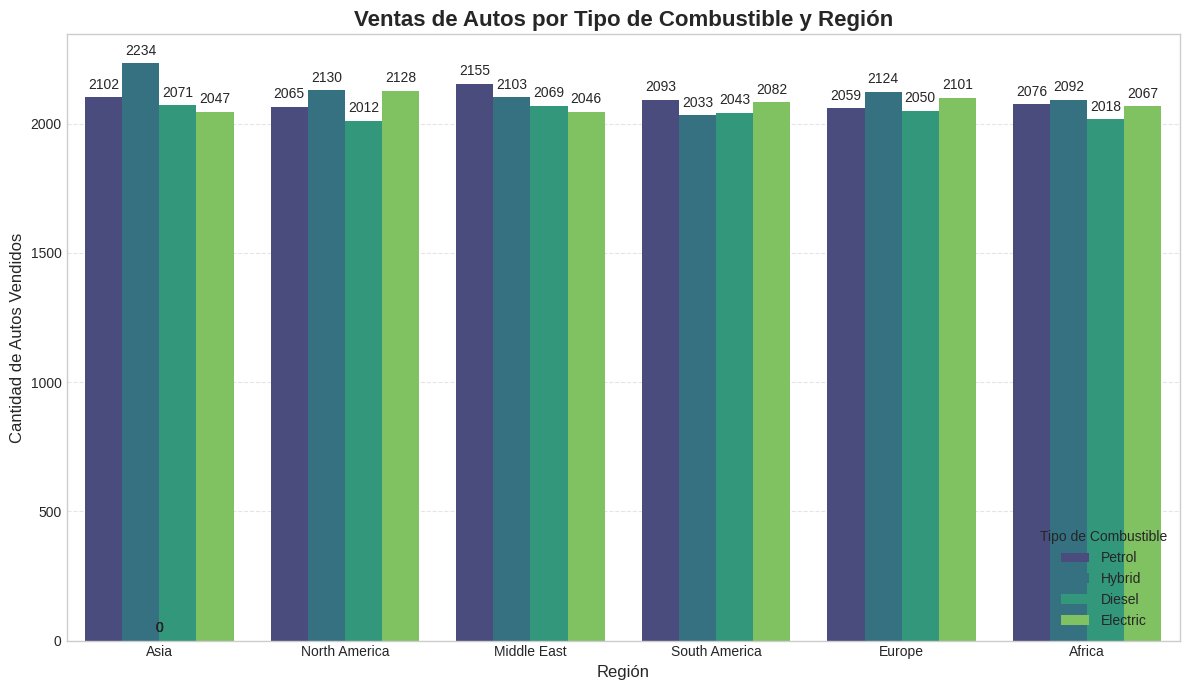

In [12]:
#Qué relación hay entre el tipo de combustible y la región donde fueron vendidos los autos?

# Creación del Gráfico de Barras Agrupadas
plt.style.use('seaborn-v0_8-whitegrid') # Estilo para un mejor aspecto
plt.figure(figsize=(12, 7)) # Tamaño de la figura

# Usamos seaborn.countplot para crear el gráfico
ax = sns.countplot(data=df, x='Region', hue='Fuel_Type', palette='viridis')

# Personalización del Gráfico
plt.title('Ventas de Autos por Tipo de Combustible y Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Cantidad de Autos Vendidos', fontsize=12)
plt.xticks(rotation=0) # Mantiene las etiquetas del eje x horizontales
plt.legend(title='Tipo de Combustible')

# Añadir etiquetas de texto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
# Estética general
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Ajusta el gráfico para que no se corten las etiquetas
plt.show()

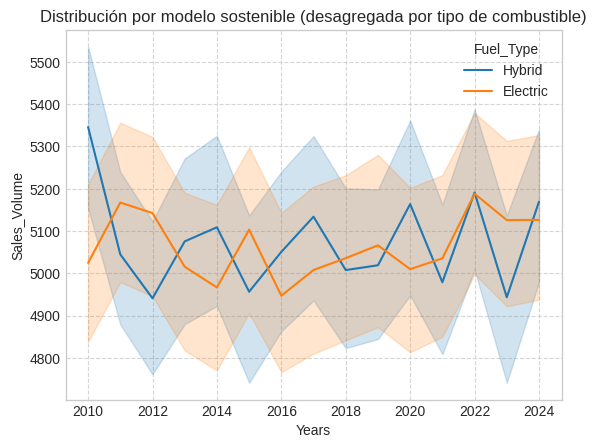

In [13]:
#2- Considerando la sostenibilidad en el mundo es un objetivo analizaremos los autos hibridos y electricos, como fueron las ventas anuales ?
# Filtrado de autos "sotenibles"
tipos_sostenibles = ['Electric', 'Hybrid']
df_sostenible = df[df['Fuel_Type'].isin(tipos_sostenibles)]
ax = sns.lineplot(data=df_sostenible, x="Year", y="Sales_Volume", hue="Fuel_Type")  # <- parámetro extra: hue
plt.title("Distribución por modelo sostenible (desagregada por tipo de combustible)")
plt.xlabel("Years"); plt.ylabel("Sales_Volume")
plt.grid(True, axis="y", linestyle="--", alpha=0.8)            # <- mejora legibilidad
plt.grid(True, axis="x", linestyle="--", alpha=0.8)
plt.legend(title="Fuel_Type")
plt.show()

VEMOS POR EL GRAFICO 2 QUE LAS VENTAS TIENEN UNA TENDENCIA SIMILAR LOS ULTIMOS DOS AÑOS

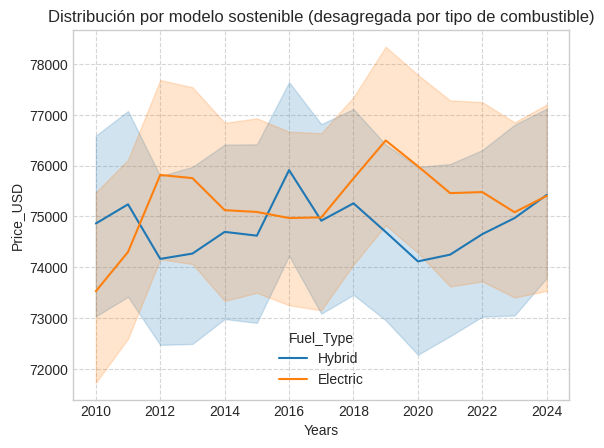

In [14]:
# 3.1-Considerando la sostenibilidad en el mundo es un objetivo que auto es mas economico el hibrido o el electrico?
# Filtrado de autos "sotenibles"
tipos_sostenibles = ['Electric', 'Hybrid']
df_sostenible = df[df['Fuel_Type'].isin(tipos_sostenibles)]
ax = sns.lineplot(data=df_sostenible, x="Year", y="Price_USD", hue="Fuel_Type")  # <- parámetro extra: hue
plt.title("Distribución por modelo sostenible (desagregada por tipo de combustible)")
plt.xlabel("Years"); plt.ylabel("Price_USD")
plt.grid(True, axis="y", linestyle="--", alpha=0.8)            # <- mejora legibilidad
plt.grid(True, axis="x", linestyle="--", alpha=0.8)
plt.legend(title="Fuel_Type")
plt.show()

OBSERVAMOS EN EL GRAFICO 3.1 QUE LOS PRECIOS EN LOS PROXIMOS AÑOS SERAN SIMILARES

In [15]:
# Grafico 3) Regla IQR sobre total_bill
q1 = df_sostenible["Price_USD"].quantile(0.25)
print("Q1", q1)
q3 = df_sostenible["Price_USD"].quantile(0.75)
print("Q3",q3)
iqr = q3 - q1
print("IQR: ",iqr)
lim_inf = q1 - 1.5*iqr
print("Limite inferior: ",lim_inf)
lim_sup = q3 + 1.5*iqr
print("Limite superior: ",lim_sup)

Q1 52325.0
Q3 97561.0
IQR:  45236.0
Limite inferior:  -15529.0
Limite superior:  165415.0


In [16]:
#Grafico 3.1: Outliers
mask_out = (df_sostenible["Price_USD"] < lim_inf) | (df_sostenible["Price_USD"] > lim_sup)
n_out = mask_out.sum()
print(f"Outliers detectados en Price_USD: {n_out}")
print(df_sostenible.loc[mask_out, ["Price_USD","Fuel_Type","Year"]])

Outliers detectados en Price_USD: 0
Empty DataFrame
Columns: [Price_USD, Fuel_Type, Year]
Index: []


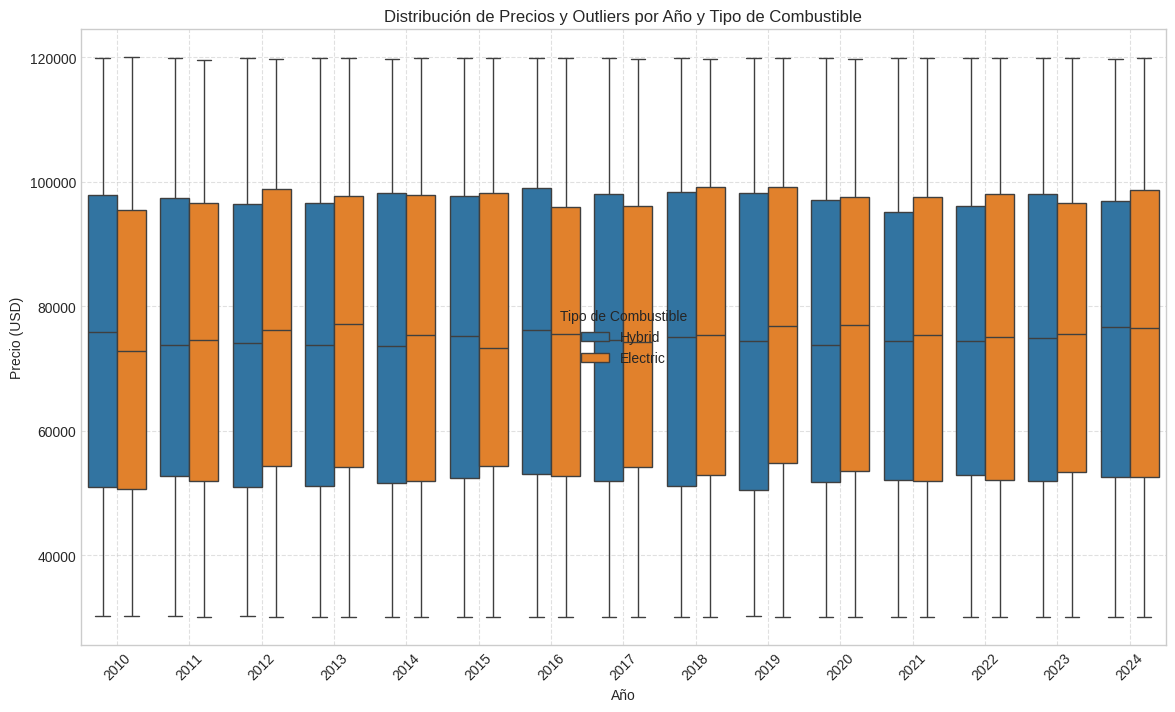

In [17]:
# --- 3.2 Visualización con un Box Plot ---
# Este gráfico es ideal para ver los outliers, que se muestran como puntos individuales.
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_sostenible, x="Year", y="Price_USD", hue="Fuel_Type")
plt.title("Distribución de Precios y Outliers por Año y Tipo de Combustible")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Tipo de Combustible")
plt.show()

**FREATURE SELECTION**

In [18]:
#DEFINIR COLUMNAS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Variables numéricas que usaremos ---
columnas_num = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Year']

# --- Variables categóricas disponibles ---
columnas_cat = ['Model','Region',	'Color',	'Fuel_Type',	'Transmission']

In [19]:
#CLASIFICACION
# Codificar variables categóricas con one-hot encoding
df_cod = pd.get_dummies(df[columnas_cat], drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd



# 1. Seleccionamos solo las filas donde Fuel_Type es 'Electric' o 'Hybrid'
tipos_deseados = ['Electric', 'Hybrid']
df_filtrado = df[df['Fuel_Type'].isin(tipos_deseados)].copy()

# --- A partir de aquí, USAMOS SIEMPRE df_filtrado ---

# --- Aseguramos que 'Year' sean enteros (en el df filtrado) ---
df_filtrado['Year'] = df_filtrado['Year'].astype(int)

# --- Variables numéricas y categóricas que realmente existen ---
columnas_num = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Year']
columnas_cat = ['Model','Region', 'Color', 'Fuel_Type', 'Transmission']

# --- Codificamos las categóricas (usando el df filtrado) ---
df_cod = pd.get_dummies(df_filtrado[columnas_cat], drop_first=True)

# --- Escalamos las variables numéricas (usando el df filtrado) ---
specified_columns_num = [col for col in columnas_num if col in df_filtrado.columns]
scaler = StandardScaler()

# Mantenemos el índice original para el concat
scaled_data = scaler.fit_transform(df_filtrado[specified_columns_num])
df_num = pd.DataFrame(scaled_data, columns=specified_columns_num, index=df_filtrado.index)

# --- Combinamos los datos preparados ---
# Ahora df_num y df_cod tienen el mismo índice y número de filas (25,187)
X = pd.concat([df_num, df_cod], axis=1)
y = df_filtrado['Sales_Volume']

# --- Dividimos en conjunto de entrenamiento y prueba ---
# Ahora X e y tienen el mismo número de filas (25,187)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Verificación de shapes ---
print(f"Filas en X (total filtrado): {X.shape[0]}")
print(f"Filas en y (total filtrado): {y.shape[0]}")
print("---")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Filas en X (total filtrado): 25187
Filas en y (total filtrado): 25187
---
X_train shape: (20149, 26)
y_train shape: (20149,)
X_test shape: (5038, 26)
y_test shape: (5038,)


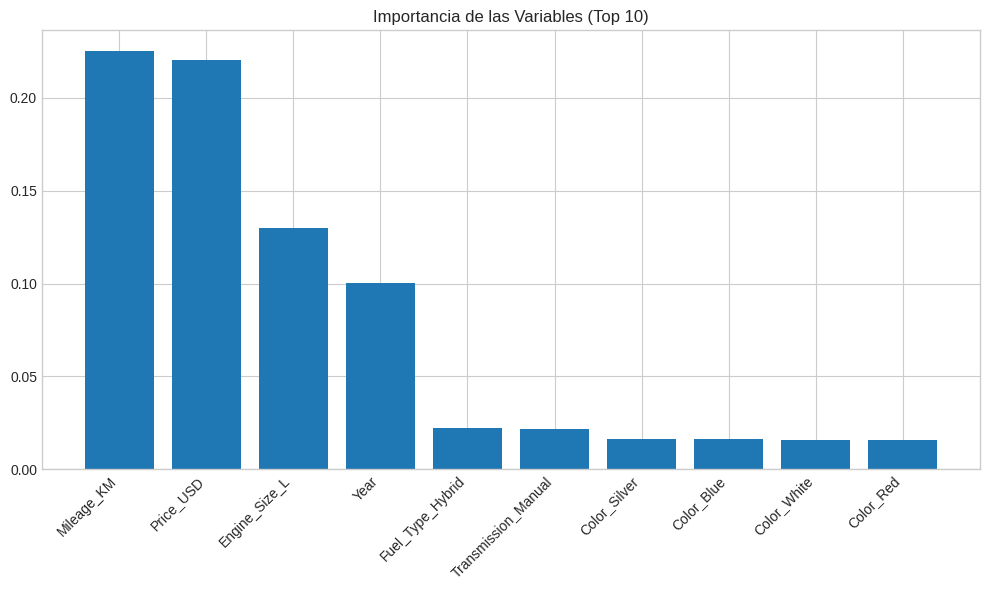

In [21]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Entrenamos un modelo rápido para medir importancia de variables
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtenemos importancias
importancias = model.feature_importances_
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns[indices]

# Mostramos top 10
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Variables (Top 10)")
plt.bar(range(10), importancias[indices][:10], align='center')
plt.xticks(range(10), nombres_features[:10], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Filtrar solo las 5 variables más importantes según el análisis anterior ---
features_top = ['Mileage_KM','Price_USD','Engine_Size_L','Year','Transmission_Manual']
X_train_sel = X_train[features_top]
X_test_sel = X_test[features_top]

# --- Entrenar modelo de regresión lineal ---
modelo = LinearRegression()
modelo.fit(X_train_sel, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



# --- Evaluación ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2%}")

🔍 Evaluación del modelo:
MAE (Error absoluto medio): 2478.40
RMSE (Raíz del error cuadrático medio): 2880.87
R² (Coeficiente de determinación): -3.28%


**Evaluación del modelo: Interpretación**

MAE: El valor 2478.40 nos indica el promedio cual el modelo se equivoca en 1442.88 unidades
MSE: El valor 8299409.44 nos indica en promedio la diferencia al cuadrado entre el volumen de ventas previsto por su modelo y el volumen de ventas real es aproximadamente

R-CUADRADO: El valor es negativo por tal motivo no podemos predecir las ventas con las variables de analisis.


**Analisis de la variable "Sales_Volume"**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # --- 1. Análisis del Rango (Estadísticas Descriptivas) ---
    print("--- Análisis Descriptivo de 'Sales_Volume' ---")
    # Usamos .describe() para obtener min, max, media, etc.
    desc_stats = df['Sales_Volume'].describe()
    print(desc_stats.to_string(float_format="%.2f"))

    # Extraer min y max explícitamente para el usuario
    min_val = desc_stats['min']
    max_val = desc_stats['max']
    print(f"\nRango de 'Sales_Volume': de {min_val:.0f} a {max_val:.0f}")

    # --- 2. Análisis de Repetición (Valores Únicos) ---
    print("\n--- Análisis de Repetición de Datos ---")

    total_rows = len(df)
    unique_values = df['Sales_Volume'].nunique()

    print(f"Total de registros: {total_rows}")
    print(f"Valores únicos en 'Sales_Volume': {unique_values}")

    if unique_values == total_rows:
        print("Conclusión: Todos los valores de 'Sales_Volume' son únicos. No se repite ninguno.")
    else:
        print(f"Ratio de unicidad: {unique_values / total_rows:.4f} (El { (unique_values / total_rows) * 100 :.2f}% de los datos son únicos)")

    # --- 3. Valores Más Frecuentes ---
    # Esto nos dirá si hay valores que se repiten
    print("\n--- 10 Valores Más Frecuentes en 'Sales_Volume' ---")
    top_10_frequent = df['Sales_Volume'].value_counts().head(10)
    print(top_10_frequent.to_string())

    # Verificar si hay valores que se repiten mucho
    if not top_10_frequent.empty and top_10_frequent.iloc[0] > 1:
        print("\nConclusión: Sí hay valores que se repiten.")
    else:
        print("\nConclusión: La mayoría de los valores son únicos o se repiten muy poco.")

except Exception as e:
    print(f"An error occurred: {e}")

--- Análisis Descriptivo de 'Sales_Volume' ---
count   50000.00
mean     5067.51
std      2856.77
min       100.00
25%      2588.00
50%      5087.00
75%      7537.25
max      9999.00

Rango de 'Sales_Volume': de 100 a 9999

--- Análisis de Repetición de Datos ---
Total de registros: 50000
Valores únicos en 'Sales_Volume': 9845
Ratio de unicidad: 0.1969 (El 19.69% de los datos son únicos)

--- 10 Valores Más Frecuentes en 'Sales_Volume' ---
Sales_Volume
9502    16
1474    14
6867    14
6976    14
7867    13
5681    13
4021    13
9618    13
2607    13
5336    13

Conclusión: Sí hay valores que se repiten.


🔍 Evaluación del modelo:
MAE (Error absoluto medio): 2452.70
RMSE (Raíz del error cuadrático medio): 2839.45
R² (Coeficiente de determinación): -0.34%

🌲 Evaluación - Random Forest
MAE: 2,471.61
RMSE: 2,875.63
R²: -0.029


/tmp/ipython-input-1046727411.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados, x='Modelo', y='R²', palette='mako')


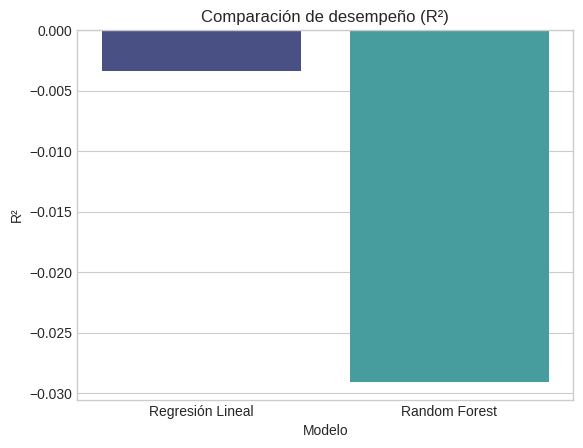


📊 Influencia de variables en el modelo lineal:
                Variable  Coeficiente
14           Region_Asia   200.744760
17  Region_North America   124.862122
15         Region_Europe    76.291802
16    Region_Middle East    53.415132
19            Color_Blue    47.784790
1             Mileage_KM    39.819084
5         Model_7 Series    34.291996
18  Region_South America    34.017954
21             Color_Red    33.820324
7               Model_M5    28.690086
23           Color_White    25.867779
6               Model_M3    22.825030
22          Color_Silver    19.422977
3                   Year    14.985549
8               Model_X1    11.562833
24      Fuel_Type_Hybrid    -3.820322
25   Transmission_Manual    -5.082953
2              Price_USD   -19.494725
20            Color_Grey   -23.845199
0          Engine_Size_L   -32.535666
4         Model_5 Series   -33.771162
13              Model_i8   -36.120559
10              Model_X5   -38.336989
9               Model_X3   -90.895464
12

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

# ============================================================
# 7️⃣ LINEAR REGRESSION MODEL
# ============================================================

# --- Train Linear Regression model ---
lr = LinearRegression()
lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = lr.predict(X_test)

# --- Evaluación ---
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("🔍 Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2%}")

# ============================================================
# 8️⃣ RANDOM FOREST PARA COMPARAR
# ============================================================

rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🌲 Evaluación - Random Forest")
print(f"MAE: {mae_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"R²: {r2_rf:.3f}")

# ============================================================
# 9️⃣ COMPARACIÓN DE MODELOS
# ============================================================

resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MAE': [mae, mae_rf],
    'RMSE': [rmse, rmse_rf],
    'R²': [r2, r2_rf]
})

sns.barplot(data=resultados, x='Modelo', y='R²', palette='mako')
plt.title('Comparación de desempeño (R²)')
plt.show()

# ============================================================
# 🔟 INTERPRETACIÓN DE COEFICIENTES (solo modelo lineal)
# ============================================================

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("\n📊 Influencia de variables en el modelo lineal:")
print(coeficientes)

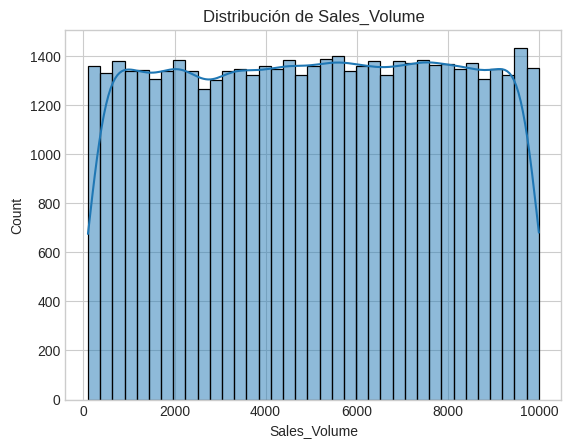

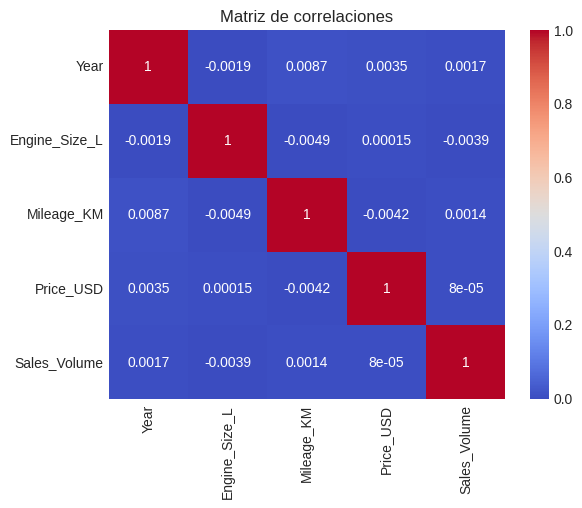

In [27]:
sns.histplot(df['Sales_Volume'], kde=True)
plt.title("Distribución de Sales_Volume")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

## Conclusiones Finales

Los resultados obtenidos muestran que no existen relaciones predictivas significativas entre las variables independientes y la variable objetivo `Sales_Volume`.

- La distribución uniforme de `Sales_Volume` sugiere que los valores fueron generados aleatoriamente o sin un patrón económico real.
- Las correlaciones con el resto de las variables son prácticamente nulas (máximo |r| < 0.01), lo que implica ausencia de dependencia estadística.
- Tanto la regresión lineal como el modelo de Random Forest presentan R² ≈ 0, indicando que su poder explicativo es nulo.

En consecuencia, los modelos no logran capturar una estructura que permita realizar predicciones precisas sobre las ventas.

### Recomendaciones
Para construir un modelo predictivo útil, sería necesario incluir variables con mayor relevancia causal, tales como:
- Precio de lanzamiento y descuentos aplicados.
- Tipo de cliente (empresa, particular, gobierno).
- Estacionalidad o mes de venta.
- Campañas publicitarias o presencia de incentivos.
- Competencia o participación de mercado por región.

Mientras el dataset no contenga señales informativas, cualquier modelo (lineal o no lineal) tenderá a comportarse como un estimador promedio.